In [2]:
import DeepMIMOv3
import numpy as np

# Channel generation
DeepMIMO_params = DeepMIMOv3.default_params() # Load the default parameters
DeepMIMO_params['dataset_folder'] = r'DeepMIMO/ray_tracing' # Path to the downloaded scenarios
DeepMIMO_params['scenario'] = 'O1_60' # DeepMIMO scenario
DeepMIMO_params['num_paths'] = 10 # Maximum number of paths
DeepMIMO_params['active_BS'] = np.array([6]) # Basestation indices to be included in the dataset

# Selected rows of users, whose channels are to be generated.
DeepMIMO_params['user_row_first'] = 400 # First user row to be included in the dataset
DeepMIMO_params['user_row_last'] = 450 # Last user row to be included in the dataset

# Configuration of the antenna arrays
DeepMIMO_params['bs_antenna']['shape'] = np.array([16, 1, 1]) # BS antenna shape through [x, y, z] axes
DeepMIMO_params['ue_antenna']['shape'] = np.array([1, 1, 1]) # UE antenna shape through [x, y, z] axes

# The OFDM_channels parameter allows choosing between the generation of channel impulse
# responses (if set to 0) or frequency domain channels (if set to 1).
# It is set to 0 for this simulation, as the channel responses in frequency domain
# will be generated using Sionna.
DeepMIMO_params['OFDM_channels'] = 0

dataset = DeepMIMOv3.generate_data(DeepMIMO_params)

The following parameters seem unnecessary:
{'user_row_first', 'user_row_last'}

Basestation 6

UE-BS Channels


Generating channels: 100%|██████████| 181/181 [00:00<00:00, 2714.85it/s]



BS-BS Channels


Generating channels: 100%|██████████| 1/1 [00:00<?, ?it/s]


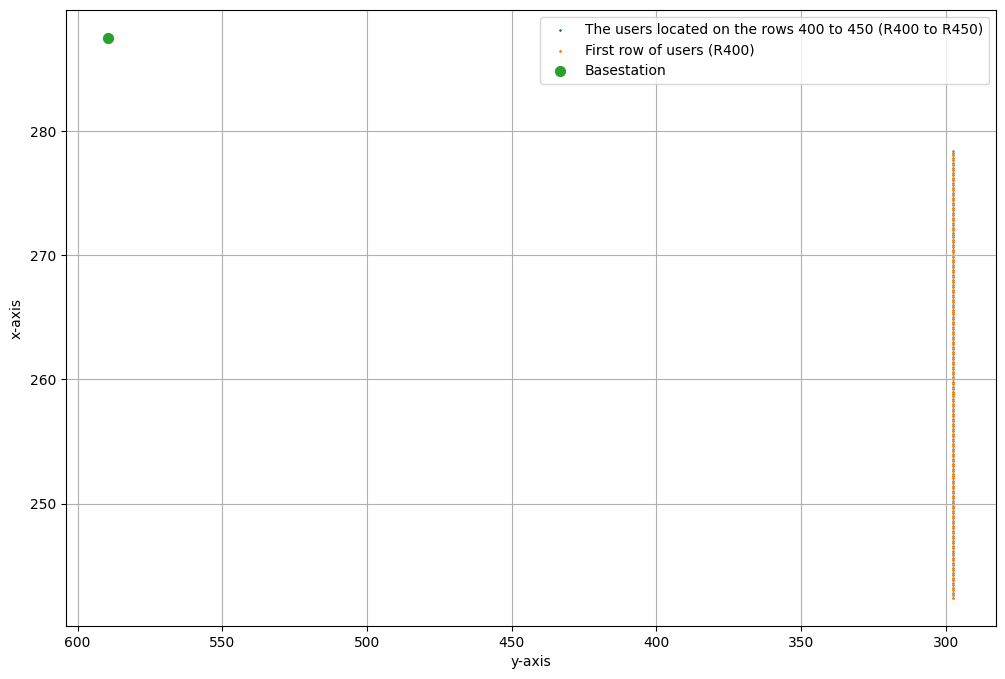

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
import os

plt.figure(figsize=(12,8))

## User locations
active_bs_idx = 0 # Select the first active basestation in the dataset
plt.scatter(dataset[active_bs_idx]['user']['location'][:, 1], # y-axis location of the users
         dataset[active_bs_idx]['user']['location'][:, 0], # x-axis location of the users
         s=1, marker='x', c='C0', label='The users located on the rows %i to %i (R%i to R%i)'%
           (DeepMIMO_params['user_row_first'], DeepMIMO_params['user_row_last'],
           DeepMIMO_params['user_row_first'], DeepMIMO_params['user_row_last']))
# First 181 users correspond to the first row

plt.scatter(dataset[active_bs_idx]['user']['location'][0:181, 1],
         dataset[active_bs_idx]['user']['location'][0:181, 0],
         s=1, marker='x', c='C1', label='First row of users (R%i)'% (DeepMIMO_params['user_row_first']))

## Basestation location
plt.scatter(dataset[active_bs_idx]['location'][1],
         dataset[active_bs_idx]['location'][0],
         s=50.0, marker='o', c='C2', label='Basestation')

plt.gca().invert_xaxis() # Invert the x-axis to align the figure with the figure above
plt.ylabel('x-axis')
plt.xlabel('y-axis')
plt.grid()
plt.legend()

In [10]:
print(dataset[0]["user"].keys())

dict_keys(['paths', 'LoS', 'location', 'distance', 'pathloss', 'channel'])
